<a href="https://colab.research.google.com/github/pedrohgarbim/am-fatec2025-turma2/blob/main/Trabalho2_20_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das Bibliotecas

In [1]:
!pip install plotly --upgrade
!pip install squarify --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 21.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import requests

# Carregamento do Dataset


In [4]:
url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&outputsize=full&apikey=JG52E5PDLURH7OVY"

r = requests.get(url)
data = r.json()

time_series = data["Time Series (Daily)"]

base_acoes = pd.DataFrame.from_dict(time_series, orient="index")

base_acoes.columns = ["Abertura", "Alta", "Baixa", "Fechamento", "Volume"]
base_acoes = base_acoes.astype(float)
base_acoes.index = pd.to_datetime(base_acoes.index)
base_acoes = base_acoes.sort_index()

In [5]:
base_acoes["Tendência"] = base_acoes["Fechamento"].diff().shift(-1)

base_acoes["Tendência"] = base_acoes["Tendência"].apply(lambda x: "alta" if x > 0 else "baixa")

base_acoes

,Abertura,Alta,Baixa,Fechamento,Volume,Tendência
1999-11-01,98.500,98.8100,96.37,96.75,9551800.0,baixa
1999-11-02,96.750,96.8100,93.69,94.81,11105400.0,baixa
1999-11-03,95.870,95.9400,93.50,94.37,10369100.0,baixa
1999-11-04,94.440,94.4400,90.00,91.56,16697600.0,baixa
1999-11-05,92.750,92.9400,90.19,90.25,13737600.0,alta
...,...,...,...,...,...,...
2025-03-13,248.800,249.2700,243.04,245.80,3862416.0,alta
2025-03-14,242.745,248.9499,241.68,248.35,4045284.0,alta
2025-03-17,249.250,254.6300,249.00,252.97,3234149.0,baixa
2025-03-18,252.510,252.5700,245.12,246.95,4172239.0,alta


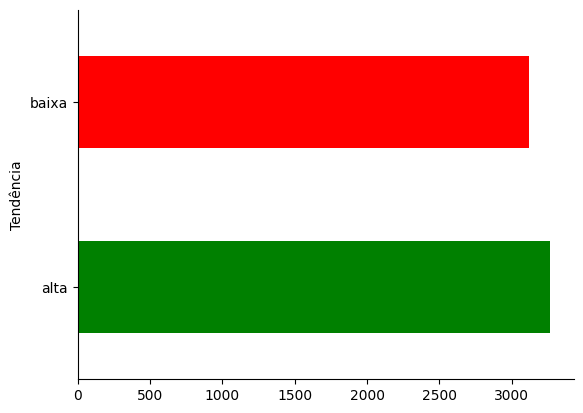

In [11]:
base_acoes.groupby('Tendência').size().plot(kind='barh', color=['green', 'red'])
plt.gca().spines[['top', 'right']].set_visible(False)